In this project, we will be using a dataset that contains information about the westbound traffic on the I-94 interstate freeway. This dataset was gathered by John Hogue at the UCI Machine Learning Repository. What we are aiming to do with this project is to determine what are the main indicators that predict traffic on the I-94. An example question for us to answer with these indicators would be "Is traffic usually heavier in the summer or the winter?"

My goal in this project is to develop my skills working with exploratory data analysis visualization tools, particularly the matplotlib.pyplot and seaborn python libraries. Particularly, I'd like to practice working with these tools in a simeultaneous application, as thus far I've only used them individually in the manner of the lessons. A secondary goal for myself here is to visualize the data for optimal readability and presentability.

Our first step below will be to import the data as a Pandas dataframe, as well as the libraries we will be using in the project. (Pandas, Matplotlib.pyplot, Seaborn)

Then, we will take a first look at the data by examining the first and last 5 rows, as well as using the DataFrame.info() method to see other characteristics about the dataset, such as data types of it's fields.

In [76]:
#Bringing in needed modules

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Bringing our dataset into Jupyter Notebook

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

#Taking a first look at our data

print(traffic.head())
print("")
print(traffic.tail())
print("")
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0  

We can see our data has no null values, the only thing to note would be the "date_time" column being an object (string) datatype, that we can likely convert to a datetime Dtype. These dates and times show that the data is representing the traffic data for a particular hour.

We will keep in mind with this dataset that it is westbound traffic only, so we will avoid making generalizations about the traffic along I-94 as a whole. We will first take a look at the distribution of the "traffic_volume" column, to get an idea of what our distribution is in terms of the westbound traffic on the I-94. We will do this by plotting this column's data as a histogram, and then using Series.describe() to see other information about the column's data.

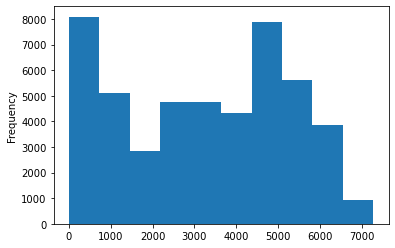

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [77]:
traffic["traffic_volume"].plot.hist()
plt.show()

print(traffic["traffic_volume"].describe())

Looking at the above, we can see a few things about the distribution of the traffic volume data. Firstly, we can see that the average volume of traffic ends up being pretty close to the middle of the overall distribution at 3259.818355. The incidences of heaviest traffic are the rarest incidences in the dataset, seeing only about 1000 values of the 48204 being traffic_volume values of 6500+. There is by far the most incidences of traffic at values of 0-500 and 4500-5000, nearly 1/3 of the entire data set, when these are only 2 out of the 10 bins of the histogram.

Next, we'd like to investigate the traffic by day and night, to see if there are any trends in the amount of traffic based on the time of day. We will do this by seperating the dataset into two 12-hour intervals representing day and night - from 7AM to 7PM, and from 7PM to 7AM.

Our first step in this is to convert the string values in the date_time column into datetime objects, and then take advantage of the datetime object type to seperate the dataset accordingly into the two 12-hour chunks.

In [78]:
#Converting entire date_time column's string data to datetime objects.

traffic["date_time"] = pd.to_datetime(traffic["date_time"])

#Splitting the traffic dataframe into two new dataframes based on the hour value of each row's date_time column.

day = traffic[(traffic["date_time"].dt.hour < 19) & (traffic["date_time"].dt.hour >= 7)]
night = traffic[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)]

#Checking the two resulting dataframes

print(day.info())
print("")
print(night.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------ 

Now that we have the data split into two data frames based on time of day, we can take a look at the distributions of both of these new datasets.

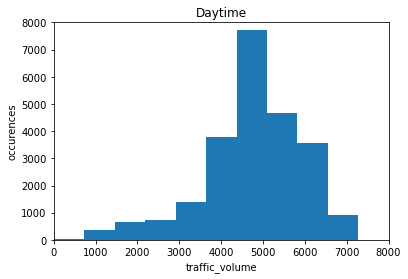

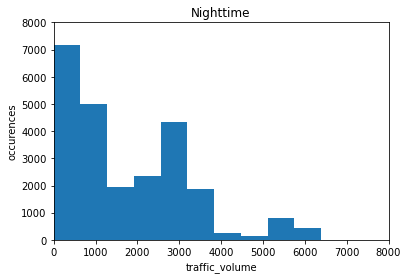

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [79]:
#Histogram for daytime, with a plot label, axis labels, and scaled ranges for easy comparison

day["traffic_volume"].plot.hist()
plt.title("Daytime")
plt.xlabel("traffic_volume")
plt.ylabel("occurences")
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.show()

#Histogram for nighttime, with a plot label, axis labels, and scaled ranges for easy comparison

night["traffic_volume"].plot.hist()
plt.title("Nighttime")
plt.xlabel("traffic_volume")
plt.ylabel("occurences")
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.show()

#More statistical information on the traffic_volume column of the two dataframes

print(day["traffic_volume"].describe())
print("")
print(night["traffic_volume"].describe())

We can see that the daytime traffic is close to a normal distribution centered around the mean of 4762. This demonstrates that most of the high values of traffic_volume in the original dataset are from daytime data points.

The nighttime traffic on the other hand, is a right-skewed distribution, with the values much more clustered around lower traffic_volume numbers - meaning that overall, there is much less traffic at night than during the daytime.

This leads us to the point that we should disregard the nighttime traffic, as there is very little data in it that would be useful to us for discovering what may be driving traffic on the I-94 westbound. We are now going to only use the daytime traffic information from now on.

In our effort to find tangible factors that drive traffic_volume, we want to reduce extraneous factors such as season to get our data more consistent. So, we are going to take a look at the daytime traffic data by month to see if there are any months we can disregard entirely.

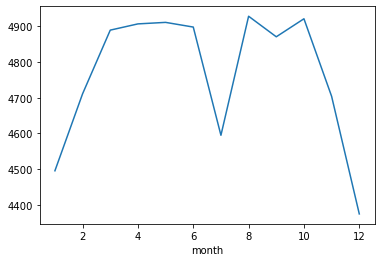

In [80]:
#including to suppress a pandas warning that does not apply to what we are trying to do here
pd.options.mode.chained_assignment = None  # default='warn'

#Generating a new column for the month, and then making a new dataframe of the daytime traffic data grouped by month

day["month"] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

#Making a line plot to visualize the traffic by month

by_month["traffic_volume"].plot.line()
plt.show()

We can see from the above, that the months of January, February, July, November, and December represent significant drops in traffic volume compared to the other 7 months. Each of the 7 other months seem to have much more similar average traffic_volume values. If we consider the July data an outlier, we can see that traffic_volume is lower in colder months, and higher in warmer months.

Now, we want to also look at how day of the week impacts the traffic_volume amount, so we will do a similar operation we did previously to group this data by day of the week and take a look at the results.

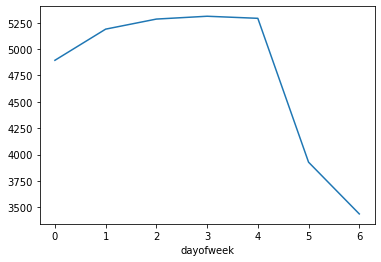

In [81]:
#0 is Monday, 6 is Sunday

day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

#Making a line plot to visualize the traffic by day of week

by_dayofweek["traffic_volume"].plot.line()
plt.show()

We can see from the above that weekday traffic is pretty consistent, but when we hit the weekend days of Saturday and Sunday (5 and 6), there is a huge drop-off in the traffic_volume.

We are going to now make a dataset for just weekdays and a dataset for just weekends so that we can have a more precise look into indicators that drive traffic, and visualize our results once again to make further observations.

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


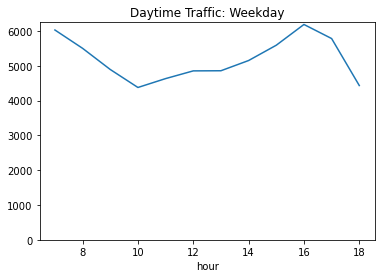

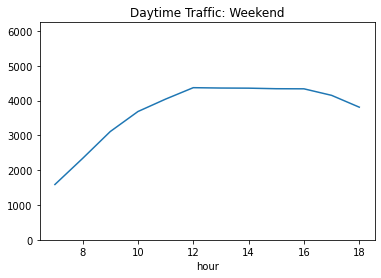

In [82]:
#Seperating the data into weekday vs. weekend datasets

day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

#Checking the outputs

print(by_hour_business['traffic_volume'])
print("")
print(by_hour_weekend['traffic_volume'])

by_hour_business["traffic_volume"].plot.line()
plt.title("Daytime Traffic: Weekday")
plt.ylim(0,6250)
plt.show()

by_hour_weekend["traffic_volume"].plot.line()
plt.title("Daytime Traffic: Weekend")
plt.ylim(0,6250)
plt.show()

We can see that traffic is definitely more uniform on weekends, with the morning hours of 7AM, 8AM, and 9AM being the only ones that are significantly different from the rest of the weekend traffic. 

With the weekday traffic, we can see much more variance throughout the day based on the time. What we can note from above is that the "rush hours" during the week are 7AM, as well as 4PM, with 8AM and 5PM being also hours of high traffic. These hours we can reliably predict will be the times of heaviest traffic.

Next, we will take a look at the weather and it's impact on the traffic by looking at the correlation values of the traffic_volume column with the different weather conditions that have been captured in the dataset.

In [83]:
#printing all correlations between each column and the traffic_volume column.

print(day.corr()["traffic_volume"])

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64


We can see from the above from the weather information columns, temp is the highest correlation with traffic_volume with a value of .128. Let's take a look at a scatter plot of traffic_volume vs. temp.

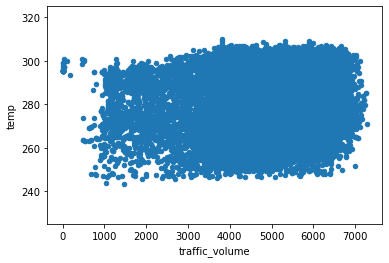

In [84]:
day.plot.scatter("traffic_volume","temp")
plt.ylim(225,325) # We set this range to eliminate two outlier values that harm our view of the majority of the data
plt.show()

Due to the appearance of our scatter plot above, even the strongest correlation weather factor, temperature, does not seem to reliably indicate an increase in traffic, as we have plenty of low traffic_volume values at low temperatures as well as high ones. The same applies with high traffic_volume numbers.

We had disregarded the weather_main and weather_description columns from the previous exercise, as they are non-numerical data that we would not have been able to derive a correlation from. Since our look at correlation based on the numerical data did not glean anything useful, we will now see if these two columns provide us any indicators that we seek. We will group the data based on these columns, and visualize the results to see if there are any indicators we can see.

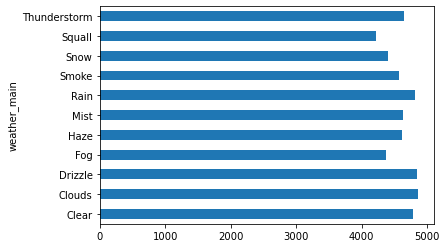

In [85]:
#Grouping the data by the two columns

by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

#Plotting weather_main vs traffic_volume

by_weather_main["traffic_volume"].plot.barh()
plt.show()

We can see there is no weather_main value that exceeds 5000, or one that indicates any significant increase in traffic over the other values. Let's look and see if the weather_description column contains anything more concrete as an indicator.

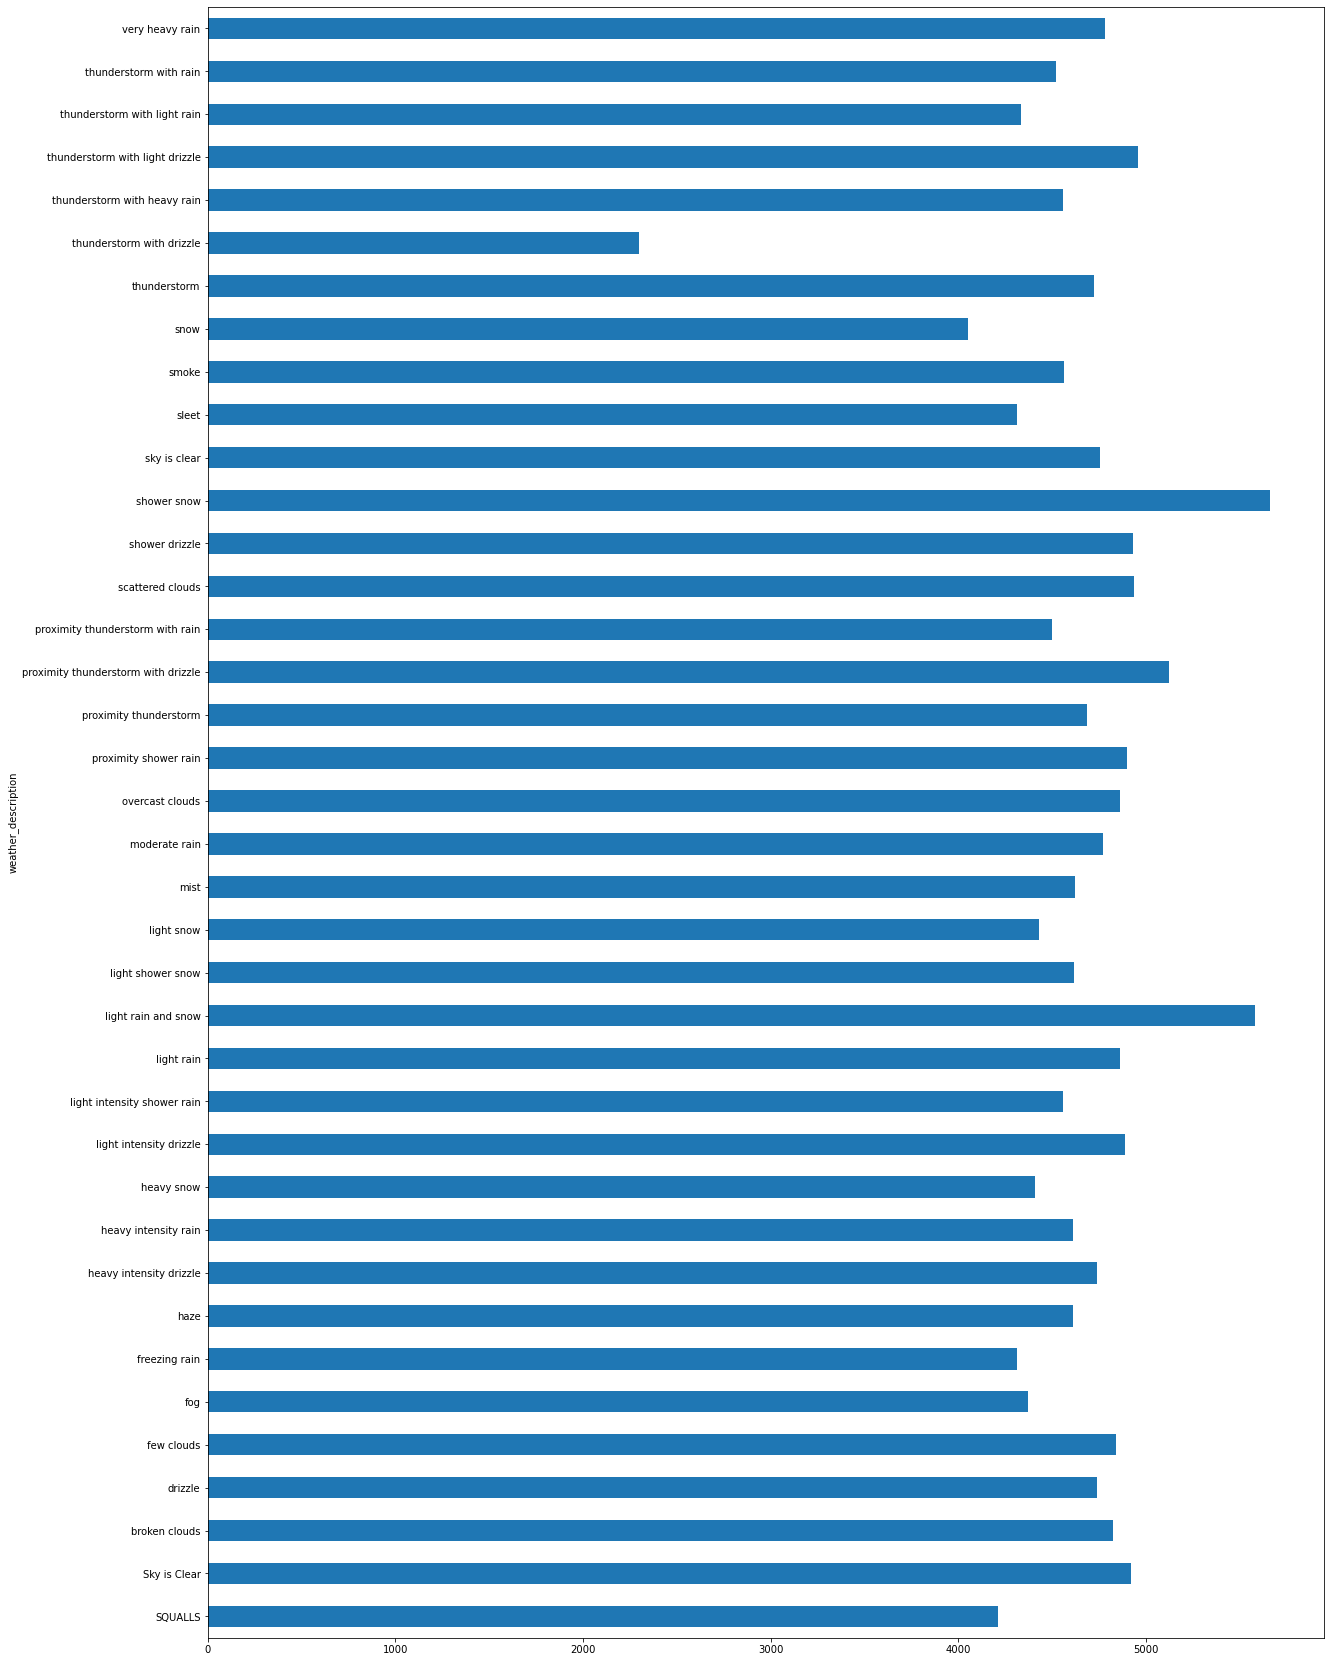

In [98]:
#Plotting weather_description vs traffic_volume, adjusting figsize for readability, there is a lot of these values

by_weather_description["traffic_volume"].plot.barh(figsize=(20,30))
plt.show()

Now, we can see some indicators - "light rain and snow", "snow shower", and "proximity thunderstorm with drizzle" cause the traffic_volume value to exceed 5000 on average. We can deduce here that when there is a snow shower (meaning a "dump" of snow that happens suddenly and ends suddenly) as well as the combination of snow/rain and thunderstorm/drizzle, there is a significant increase in the traffic_volume during those weather conditions, although the two that involve snow is a more significant increase over the thunderstorm/drizzle weather condition.

In conclusion, we can see the following:
- Traffic is heavier during warm months over cold months
- Traffic is heavier on business days over weekends
- Traffic is heaviest during the rush hours around 7AM and 4PM
- Shower snow, Light rain and Snow, and Proximity thunderstorm with drizzle are the three weather types that we can expect the biggest increase in traffic volume from

We hope this information will help you drive more intelligently and safely! Thank you for reading along with us.